In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('titanic/train.csv') \
#../ <<으로 현재있는 폴더 밖의
#상대경로상 파일 불러올때 쓰임.

In [3]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 변수해석부터!!
#0 : 승객 이름, 1 : 생존 여부, 2: 승객 등급, 3: 이름, 4: 성별,
#5: 나이, 6:사촌+배우자의 수,
#7: 부모님+아이들의 수, 8: 티켓번호, 9: 요금, 10: 선실, 11: 선착장(어디서 탔는지)

In [6]:
train.isnull().sum() #분류:classification => object가 나옴, 회귀: regression =>실수가 나옴

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Survived'].value_counts() # 0이 사망자, 1이 생존자

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# 성별 별 생존.사망자수의 분포를 시각화 하라!

In [9]:
sex_df = train.groupby(['Survived','Sex'],as_index=False)['Pclass'].count()

In [10]:
sex_df['name'] = sex_df['Sex'] + sex_df['Survived'].astype(str)

In [11]:
sex_df

,Survived,Sex,Pclass,name
0,0,female,81,female0
1,0,male,468,male0
2,1,female,233,female1
3,1,male,109,male1


In [12]:
train_S=train.groupby(['Survived','Sex'])['Survived'].count()

In [13]:
type(train_S)

pandas.core.series.Series

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='name', ylabel='Pclass'>

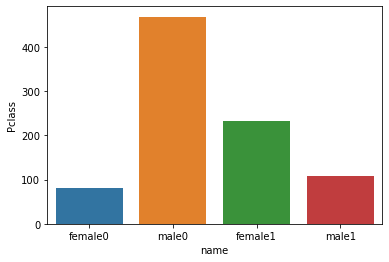

In [15]:
sns.barplot(data=sex_df, x = 'name', y='Pclass')

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

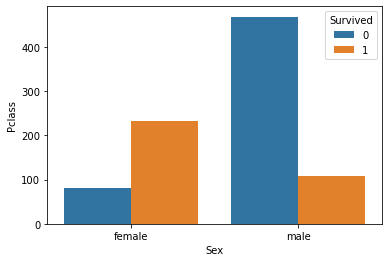

In [16]:
sns.barplot(data=sex_df, x = 'Sex', hue='Survived', y='Pclass')

In [17]:
#남자의 생존률 과 여자의 생존률을 구하라.

In [18]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
train['Sex'].str.lower()

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [20]:
train.groupby('Sex')['Survived'].mean() # 성별이 여성일수록 생존률이 높아짐.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [21]:
train.groupby('Pclass')['Survived'].mean()  #등급이 높을수록 살 확률이 높아짐.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [22]:
train.groupby('SibSp')['Survived'].mean().sort_values(ascending =False)
#5명 이상이면 무조건 죽는다? = NO, 전처리 필요

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [23]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
train.groupby('Parch')['Survived'].mean().sort_values(ascending =False)
# 4 이상이면 무조건 죽는다? = NO, 전처리 필요

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64

In [25]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [1]:
train.groupby('Embarked')['Survived'].mean() #선착장도 생존율에 유의미한 데이터

NameError: name 'train' is not defined

In [27]:
#Pclass별 sex별 살 확률?

In [28]:
train.groupby(['Pclass', 'Sex'])['Survived'].mean().sort_values(ascending=False)

Pclass  Sex   
1       female    0.968085
2       female    0.921053
3       female    0.500000
1       male      0.368852
2       male      0.157407
3       male      0.135447
Name: Survived, dtype: float64

In [29]:
#Class 별 요금의 평균

In [30]:
train.groupby('Pclass')['Fare'].mean() #클래스 별 요금의 차이가 확연함.

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [31]:
train.groupby('Embarked')['Fare'].mean() #선착장 별로 요금의 차이 있다.

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [32]:
#Pclass별 sex별 살 확률과 요금의 평균

In [33]:
train.groupby(['Pclass', 'Sex'])[['Survived','Fare']].mean()

Survived        Fare
Pclass Sex                         
1      female  0.968085  106.125798
       male    0.368852   67.226127
2      female  0.921053   21.970121
       male    0.157407   19.741782
3      female  0.500000   16.118810
       male    0.135447   12.661633

---------------------------------------------------------------

---------------------------------------------------------------------

In [34]:
train #feature engineering => 원본을 전처리하는 과정

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
train.isnull().sum() #age, cabin, embarked의 전처리가 필요!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
train['Age'].median()

28.0

In [37]:
train.groupby('Sex')['Age'].median() # female 값만 가져오려면은, 

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [38]:
train['Age'][-5:] # 이게 원본 // 아래가 원본의 none값을 중위값으로 채운것.

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [39]:
train.groupby('Sex', as_index=False)['Age'].transform('median') #중앙값으로 대체

,Age
0,29.0
1,27.0
2,27.0
3,27.0
4,29.0
...,...
886,29.0
887,27.0
888,27.0
889,29.0


In [40]:
train2 = train.copy()

In [41]:
train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
train2['Age'] = train2['Age'].fillna(train.groupby('Sex')['Age'].transform('median'))

In [43]:
train2.isnull().sum() #Age의 null 값을 중위값으로 다 채움. (null값의 전처리 과정)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [46]:
train['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [47]:
train['Name'].head(20)  #정규 표현식을 사용해야한다! *점프투파이썬 참조!

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [48]:
train['Name'].str.extract('([a-zA-Z]+),') #문자 전체(a-zA-Z),숫자 전체 (0-9)
                            #문자열을 뽑아와라 <',' 콤마 전까지 >

,0
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


In [49]:
train['Name'].str.extract('([(])+')

,0
0,NaN
1,(
2,NaN
3,(
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [50]:
train['Name'].str.extract('\(([a-zA-Z ]+)\)')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [51]:
train['Name'][:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
train['Title']= train['Name'].str.extract('([a-zA-Z]+)\.')

NameError: name 'train' is not defined

In [188]:
train[train['Title']== 'Mr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Title2,Title4,Age2,Embarked2,Cabin2,Sex2,Fare2,FamilySize,FamilySize2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,0,0,1,0,2.0,9,0,2,0.4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,0,0,2,0,2.0,9,0,1,0.0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,...,Mr,0,0,2,2,2.0,9,0,1,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,Mr,0,0,3,0,1.6,9,2,1,0.0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,...,Mr,0,0,1,0,2.0,9,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,...,Mr,0,0,2,0,2.0,9,0,1,0.0
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,...,Mr,0,0,2,0,1.8,9,0,1,0.0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,...,Mr,0,0,1,0,2.0,9,0,1,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,Mr,0,0,1,1,0.8,9,1,1,0.0


In [53]:
train[['Name','Title']]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


In [54]:
train['Name'].str.extract('[(]([a-zA-Z ]*)[)]')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [55]:
train['Name'].str.extract('[(]([a-zA-Z ]+)[)]')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [56]:
#Title을 숫자로 바꾸기
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [57]:
train['Title'][0]

'Mr'

In [58]:
len(train['Title'])

891

In [59]:
# 데이터처리 // 
# mr => 0 으로 miss => 1로 mrs를 2로 other 3으로 바꾸기의 세가지 방법!! <안보고 3가지 방법 다 할때 까지 계속 해볼것!>
train['Title'].map

<bound method Series.map of 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object>

In [4]:
title2(10)

NameError: name 'train' is not defined

In [60]:
#map 활용

In [61]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [62]:
title_map = {}
for value, key in enumerate(train['Title'].unique()):
    if value >=3 :
        title_map[key] = 3
    else :
        title_map[key] = value

In [63]:
title_map

{'Mr': 0,
 'Mrs': 1,
 'Miss': 2,
 'Master': 3,
 'Don': 3,
 'Rev': 3,
 'Dr': 3,
 'Mme': 3,
 'Ms': 3,
 'Major': 3,
 'Lady': 3,
 'Sir': 3,
 'Mlle': 3,
 'Col': 3,
 'Capt': 3,
 'Countess': 3,
 'Jonkheer': 3}

In [64]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [65]:
train['Title'] = train['Title'].str.lower()

In [66]:
title_map = {} #mapping 방식 1번
for title in train['Title'].unique():
    if title == 'mr' :
        title_map[title] = 0
    elif title == 'miss' :
        title_map[title] = 1
    elif title == 'mrs' :
        title_map[title] = 2
    else :
        title_map[title] = 3

In [67]:
title_map

{'mr': 0,
 'mrs': 2,
 'miss': 1,
 'master': 3,
 'don': 3,
 'rev': 3,
 'dr': 3,
 'mme': 3,
 'ms': 3,
 'major': 3,
 'lady': 3,
 'sir': 3,
 'mlle': 3,
 'col': 3,
 'capt': 3,
 'countess': 3,
 'jonkheer': 3}

In [68]:
train['Title2']= train['Title'].map(title_map)

In [69]:
train['Title2']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title2, Length: 891, dtype: int64

In [70]:
train['Title2'].value_counts()

0    517
1    182
2    125
3     67
Name: Title2, dtype: int64

In [71]:
def title_mapping(title) :  #apply 방식 2번
    if title == 'mr' :
        return 0
    elif title == 'miss' :
        return 1
    elif title == 'mrs' :
        return 2
    else :
        return 3 

In [72]:
train['Title'].apply(title_mapping)

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title, Length: 891, dtype: int64

In [73]:
train['Title'].apply

<bound method Series.apply of 0        mr
1       mrs
2      miss
3       mrs
4        mr
       ... 
886     rev
887    miss
888    miss
889      mr
890      mr
Name: Title, Length: 891, dtype: object>

In [74]:
title_mapping(title)

3

In [5]:
import numpy as np

In [184]:
# where 3번

In [6]:
train['Title4']=np.where(train['Title']== 'mr', 0,      
                np.where(train['Title'] =='miss', 1,
                np.where(train['Title'] =='mrs', 2, 3)))

NameError: name 'np' is not defined

In [77]:
train['Title4']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title4, Length: 891, dtype: int32

In [78]:
train['Title2']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title2, Length: 891, dtype: int64

In [79]:
train.groupby('Title2')['Age'].median() #1이 미혼 , 2가 기혼 (차이가 존재한다는 것을 확인)

Title2
0    30.0
1    21.0
2    35.0
3     9.0
Name: Age, dtype: float64

Age값의 null값에 median값 채워주기

In [80]:
train.groupby('Title2')['Age'].median()

Title2
0    30.0
1    21.0
2    35.0
3     9.0
Name: Age, dtype: float64

In [81]:
train.groupby('Title2', as_index=False)['Age'].transform('median')

,Age
0,30.0
1,35.0
2,21.0
3,35.0
4,30.0
...,...
886,9.0
887,21.0
888,21.0
889,30.0


In [82]:
train.groupby('Title2')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [83]:
train['Age'] = train['Age'].fillna(train.groupby('Title2')['Age'].transform('median'))

In [84]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [85]:
train['Age'].isnull().sum()

0

In [86]:
train['Age'].median()

30.0

In [87]:
train['Age'].mean()

29.372805836139168

In [88]:
train['Age'].describe()

count    891.000000
mean      29.372806
std       13.227346
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [89]:
import seaborn as sns

In [90]:
# 연령별 생존자의 변화 추이 살펴보기 (시각화)

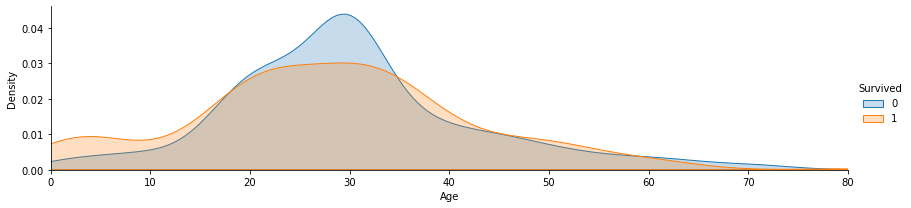

In [91]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)  #한줄씩 실행시켜서 변화확인!!
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

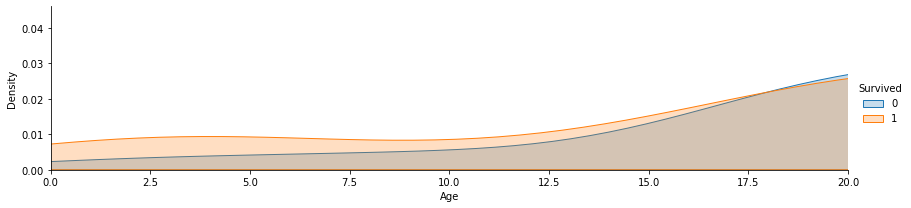

In [92]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)  #한줄씩 실행시켜서 변화확인!!
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, 20))
facet.add_legend()

In [93]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [94]:
def Age_C(i) :
    if i <= 16 :
        return 0
    elif i <=26 :
        return 1
    elif i <=36 :
        return 2
    elif i <=62 :
        return 3
    else :
        return 4

In [95]:
train['Age2']=train['Age'].apply(Age_C)

In [96]:
train['Age2']

0      1
1      3
2      1
3      2
4      2
      ..
886    2
887    1
888    1
889    1
890    2
Name: Age2, Length: 891, dtype: int64

In [97]:
train['Age2'].value_counts()

2    336
1    255
3    180
0    105
4     15
Name: Age2, dtype: int64

In [98]:
train.loc[(train['Age']<=16), 'Age2'] = 0
train.loc[(train['Age']>16) & (train['Age']<=26), 'Age2'] = 1
train.loc[(train['Age']>26) & (train['Age']<=36), 'Age2'] = 2
train.loc[(train['Age']>36) & (train['Age']<=62), 'Age2'] = 3
train.loc[ train['Age'] > 62, 'Age2'] = 4 

In [99]:
train['Age2'].value_counts()

2    336
1    255
3    180
0    105
4     15
Name: Age2, dtype: int64

In [100]:
train.loc[train['Age']<=16]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Title4,Age2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,master,3,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,mrs,2,2,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,miss,1,1,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,miss,1,1,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,master,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,master,3,3,0
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,miss,1,1,0
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,miss,1,1,0
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,master,3,3,0


In [101]:
# 나이 구간 별 살아 남을 확률 구해보시오.

In [102]:
train['Age2']

0      1
1      3
2      1
3      2
4      2
      ..
886    2
887    1
888    1
889    1
890    2
Name: Age2, Length: 891, dtype: int64

In [103]:
train.groupby('Age2')['Survived'].mean().sort_values(ascending =False)

Age2
0    0.542857
3    0.383333
1    0.380392
2    0.345238
4    0.200000
Name: Survived, dtype: float64

In [104]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title2           0
Title4           0
Age2             0
dtype: int64

In [105]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Embarked의 전처리 방법
1. "2"라는 수치가 얼마 안되서 그냥 S클래스에 포함시킨다.


In [106]:
train.groupby(['Pclass','Embarked'])['Survived'].count()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Survived, dtype: int64

In [107]:
train['Embarked'].fillna('S', inplace=True)

In [108]:
train['Embarked'].isnull().sum()

0

In [109]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [110]:
# S => 0, C => 1 , Q => 2 로 바꾸기! (map, apply, where)

In [111]:
train['Embarked2']=np.where(train['Embarked'] =='S', 0,
                   np.where(train['Embarked'] =='C', 1, 2))

In [112]:
train['Embarked2'].value_counts()

0    646
1    168
2     77
Name: Embarked2, dtype: int64

In [113]:
#풀이 #mapping

In [114]:
train['Embarked2'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [115]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Cabin 항목 null값의 전처리

In [116]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [117]:
train['Cabin'].str[0] #Cabin 은 Pclass와 연관이 있을 것이다???

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [118]:
# Pclass별로 나눠보기

In [119]:
train[train['Pclass']==1]['Cabin'].str[0].unique()    # *각각의 등급별로 가중치를 부여!

array(['C', 'E', 'A', nan, 'B', 'D', 'T'], dtype=object)

In [120]:
train[train['Pclass']==1]['Cabin']

1              C85
3             C123
6              E46
11            C103
23              A6
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 216, dtype: object

In [121]:
train[train['Pclass']==2]['Cabin'].str[0].unique()

array([nan, 'D', 'F', 'E'], dtype=object)

In [122]:
train[train['Pclass']==3]['Cabin'].str[0].unique()

array([nan, 'G', 'F', 'E'], dtype=object)

In [123]:
train['Cabin'] = train['Cabin'].str[0]

In [124]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [125]:
train['Cabin2'] = train['Cabin'].map({'A':0, 'B':0.4,'C':0.8, 'D':1.2, 'E':1.6, 'F':2.0, 'G':2.4, 'T':2.8})
train['Cabin2'].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin2, dtype: int64

In [126]:
# A => 0, B => 0.4, C =>0.8, ... , T => 2.8

In [127]:
def Cabin_g(i) :
    if i == 'A' :
        return 0
    elif i == 'B' :
        return 0.4
    elif i == 'C' :
        return 0.8
    elif i == 'D' :
        return 1.2
    elif i == 'E' :
        return 1.6
    elif i == 'F' :
        return 2
    elif i == 'G' :
        return 2.4
    elif i == 'T' :
        return 2.8
    else :
        pass

In [128]:
train['Cabin2'] = train['Cabin'].apply(Cabin_g)

In [129]:
# Pclass 별 cabin의 median

In [130]:
train.groupby('Pclass')['Cabin2'].median()

Pclass
1    0.8
2    1.8
3    2.0
Name: Cabin2, dtype: float64

In [131]:
train['Cabin2'].fillna(train.groupby('Pclass')['Cabin2'].transform('median'), inplace = True)

In [132]:
train['Cabin2'].value_counts()

2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: Cabin2, dtype: int64

In [133]:
train['Cabin2'].median()

2.0

In [134]:
train['Cabin2'].isnull().sum()

0

In [135]:
train['Cabin2'].mean()

1.6695847362513965

In [136]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Title4,Age2,Embarked2,Cabin2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr,0,0,1,0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,mrs,2,2,3,1,0.8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,1,1,1,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,mrs,2,2,2,0,0.8
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr,0,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,rev,3,3,2,0,1.8
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,miss,1,1,1,0,0.4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,miss,1,1,1,0,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,mr,0,0,1,1,0.8


In [137]:
# 성별을 0 .1로 바꾸기

In [6]:
train['Sex2']=np.where(train['Sex'].str.lower() == 'male', 0, 1)

In [139]:
train['Sex2'].value_counts()

9    577
1    314
Name: Sex2, dtype: int64

In [140]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Title4,Age2,Embarked2,Cabin2,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr,0,0,1,0,2.0,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,mrs,2,2,3,1,0.8,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,1,1,1,0,2.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,mrs,2,2,2,0,0.8,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr,0,0,2,0,2.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,rev,3,3,2,0,1.8,9
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,miss,1,1,1,0,0.4,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,miss,1,1,1,0,2.0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,mr,0,0,1,1,0.8,9


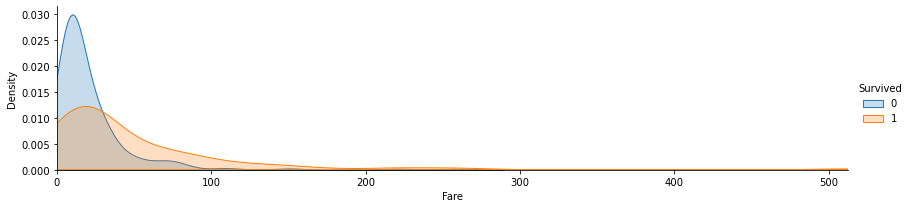

In [141]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)  #한줄씩 실행시켜서 변화확인!!
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

In [142]:
train['Fare2'] = np.where(train['Fare']<= 17, 0,
                  np.where(train['Fare']<= 30, 1,
                  np.where(train['Fare']<= 100, 2, 3)))

In [143]:
train['Fare2'].value_counts()

0    496
2    181
1    161
3     53
Name: Fare2, dtype: int64

In [145]:
train['FamilySize'] = train['SibSp'] + train['Parch'] +1

In [147]:
train['FamilySize'].value_counts()
# 1 : 0 / 2: 0.4 / ~ / 11 :4 

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [149]:
train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [152]:
train['FamilySize2'] = train['FamilySize'].map({'1':0, '2':0.4,'3':0.8, '4':1.2, '5':1.6, '6':2.0, '7':2.4, '8':2.8, '11' :4.0})
train['FamilySize2'].value_counts()

#for c, v in enumerate ('FamilySize') :
#FamilySize[v] = round(c * 0.4)

Series([], Name: FamilySize2, dtype: int64)

In [151]:
train['FamilySize2']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: FamilySize2, Length: 891, dtype: float64

In [157]:
family_mapping = {}
for value, key in enumerate(range(1, 12)) :
    #print (round(value * 0.4,1), key)
    family_mapping[key] = round(value*0.4, 1)            

In [158]:
family_mapping

{1: 0.0,
 2: 0.4,
 3: 0.8,
 4: 1.2,
 5: 1.6,
 6: 2.0,
 7: 2.4,
 8: 2.8,
 9: 3.2,
 10: 3.6,
 11: 4.0}

In [159]:
train['FamilySize2']= train['FamilySize'].map(family_mapping)

In [160]:
train['FamilySize2'].value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize2, dtype: int64

In [161]:
train[['Survived', 'Pclass','Age2','Embarked2','Cabin2', 'Sex2', 'Fare2', 'FamilySize2']]

,Survived,Pclass,Age2,Embarked2,Cabin2,Sex2,Fare2,FamilySize2
0,0,3,1,0,2.0,9,0,0.4
1,1,1,3,1,0.8,1,2,0.4
2,1,3,1,0,2.0,1,0,0.0
3,1,1,2,0,0.8,1,2,0.4
4,0,3,2,0,2.0,9,0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,2,0,1.8,9,0,0.0
887,1,1,1,0,0.4,1,1,0.0
888,0,3,1,0,2.0,1,1,1.2
889,1,1,1,1,0.8,9,1,0.0


In [164]:
test = pd.read_csv('titanic/test.csv')

In [165]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [166]:
#test 데이터의 fare의 빈값(null)은 Pclass의 중앙값으로 한다.

In [179]:
test['Pclass'].median()

3.0

In [180]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace= True)

In [181]:
test['Fare'].isnull().sum()

0

In [182]:
test['Fare'].mean()

35.56084545454542

In [183]:
test['Fare'].median()

14.4542